# More of Gaussian Likelihood and $\chi^{2}$. Fitting a Parabole.

# 1.- Maximizing the logarithm of the Gaussian Likelihood.

In [2]:
#import main libraries
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Making a time and data set with quadratic behaviour
#These data will be the same for both methods (chi square and gaussian likelihood)
y = np.square(np.linspace(-10,10,100))
t = np.linspace(-10,10,100)

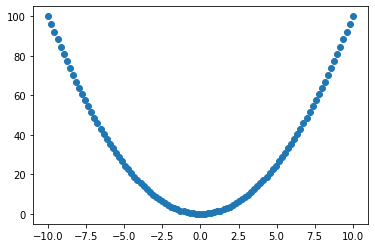

In [4]:
#Plotting
plt.plot(t,y,'o')

In [5]:
#Creating white noise to the data set with numpy.random.normal
noise = np.random.normal(loc=0, scale=5, size=100)
#Adding that noise to our data set
signal = y + noise

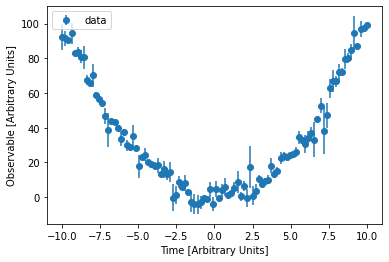

In [6]:
#Plotting the noisy data
plt.errorbar(t, signal, yerr = noise, label = 'data', fmt = 'o')
plt.xlabel('Time [Arbitrary Units]')
plt.ylabel('Observable [Arbitrary Units]')
plt.legend()
plt.show()

In [7]:
#Defining a parabolic function
def parab(t,p):
    a = p[0]
    b = p[1]
    c = p[2]
    return a*t**2 + b*t + c

In [8]:
#Defining a function for the logarithmic Gaussian likelihood
def negalolik(p,t,y,noise):
    f = parab(t,p)
    chidos = (y - f)**2/noise**2
    lognorm = np.log(2 * np.pi * noise**2)
    total = lognorm + chidos
    loglike = -0.5*np.sum(total)
#Since we are trying to maximize the gaussian likelihood, we have to minimize its negative.     
    return -loglike

In [9]:
#Maximizing the likelihood.
lik_model = minimize(negalolik,x0=[0,0,0], args=(t,y,noise))

In [10]:
print(lik_model)

      fun: 185.0303555170079
 hess_inv: array([[ 1.49742958e-05,  4.90867852e-06, -4.73190075e-04],
       [ 4.90867852e-06,  1.09754406e-04, -6.09211226e-04],
       [-4.73190075e-04, -6.09211226e-04,  1.82214326e-02]])
      jac: array([ 1.90734863e-06, -1.90734863e-06, -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 9.99999919e-01, -4.21710014e-08,  2.61407181e-06])


In [11]:
print("The optimized values of our parameters are:","a =", lik_model.x[0],", b =",lik_model.x[1], "and c =", lik_model.x[2])

The optimized values of our parameters are: a = 0.9999999191468961 , b = -4.217100135023713e-08 and c = 2.6140718076814795e-06


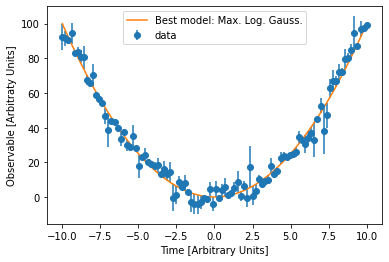

In [12]:
#Now plotting the noisy data with the best fit obtained by maximizing the log gaussian likelihood
f = parab(t,lik_model.x)
plt.errorbar(t,signal, yerr = noise, label = "data", fmt = "o")
plt.plot(t,f, label = "Best model: Max. Log. Gauss.")
plt.xlabel("Time [Arbitrary Units]")
plt.ylabel("Observable [Arbitraty Units]")
plt.legend()
plt.show()

# 2.- Minimizing $\chi^{2}$.

In [13]:
#Defining a new quadraditc function
def quadra(t,para):
    d = para[0]
    e = para[1]
    g = para[2]
    return d*t**2 + e*t + g 

In [14]:
#Defining a function for the chi square
def jicuadro(para,t,y,noise):
    m   = quadra(t,para)
    chi = 0.5*(y - m)**2/noise**2
    chi_square = np.sum(chi)
    return chi_square

In [15]:
#Minimizing the chi_square
ji_cuadro = minimize(jicuadro,x0=[0,0,0],args=(t,y,noise))

In [16]:
print(ji_cuadro)

      fun: 2.181424116280271e-10
 hess_inv: array([[ 1.49742983e-05,  4.90868252e-06, -4.73190207e-04],
       [ 4.90868252e-06,  1.09754421e-04, -6.09211476e-04],
       [-4.73190207e-04, -6.09211476e-04,  1.82214391e-02]])
      jac: array([-9.61606073e-11, -2.05455432e-10, -4.06584662e-12])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 9.99999919e-01, -4.18258391e-08,  2.60481623e-06])


In [17]:
print("The optimized values of our parameters are:", "d =", ji_cuadro.x[0], "e =", ji_cuadro.x[1], "and g =", ji_cuadro.x[2])

The optimized values of our parameters are: d = 0.9999999193797848 e = -4.182583912870395e-08 and g = 2.6048162251339234e-06


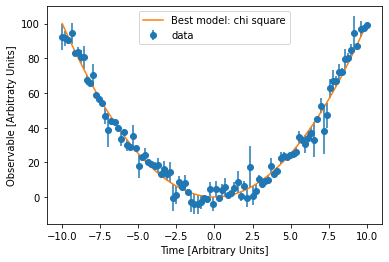

In [18]:
#Now plotting the noisy data with the best fit obtained by minimzing the chi square
m = quadra(t,ji_cuadro.x)
plt.errorbar(t,signal, yerr = noise, label = "data", fmt = "o")
plt.plot(t,m, label = "Best model: chi square")
plt.xlabel("Time [Arbitrary Units]")
plt.ylabel("Observable [Arbitraty Units]")
plt.legend()
plt.show()

# Comparing the values of the parameters.

## When maximizing the log of the Gaussian likelihood, the mathematical model was the following:

$f = ax^{2} + bx +c$

## Meanwhile, when minimizing the $\chi^{2}$, the mathematical model was the same, but with other set of parameters:

$f = dx^{2} + ex + g$

## We can see from the plots that both models created very good and pretty similar fits to the data. So, let's compare the value of each set of parameters.

In [19]:
#Assigning the optimized values to the parameters once more.

#Parameters found with Gaussian Likelihood
a = lik_model.x[0]
b = lik_model.x[1]
c = lik_model.x[2]

#Parameters found with chi square
d = ji_cuadro.x[0]
e = ji_cuadro.x[1]
g = ji_cuadro.x[2]

In [20]:
#Making the substractions
d_ad = np.abs(a - d)
d_be = np.abs(b - e)
d_cg = np.abs(c - g)

print(d_ad)
print(d_be)
print(d_cg)

2.328887083180575e-10
3.451622215331818e-10
9.255582547556064e-09


## Making a table with those values:

| Max. log | Chi square | Difference abs(Max.log - Chi square)|
| :- | -: | :-: |
| a = 0.9999999515503154 | d = 0.9999999521317796| 5.814642101142908e-10
| b = -2.0118267329448034e-07| e = -2.0036355083364807e-07| 8.191224608322667e-10 
| c = 1.5148696085789254e-06  | g = 1.480158987189617e-06| 3.471062138930836e-08